# CPSC 4300/6300-001 Applied Data Science (Fall 2020)

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Dane Acena"
COLLABORATORS = ""

# CPSC4300/6300-001 Problem Set #3

# Part C. Prepare Data for Machine Learning

## 0. Set up environment 

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## 1. Get the data

In [3]:
housing = pd.read_csv("input/housing.csv")
attribute_caps = housing[['median_income', 'housing_median_age', 'median_house_value']].max()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## 2. Create Train-Test Split Using Stratified Shuffle Split

Normally, you can use the __train_test_split()__ method in the __sklearn.model_selection__ model to split the a data set data. 

However, a simple random split approach sometime may be not ideal. As shown in the histograms below, most of the samples are concentrated in the regions where median_income is in the range of [1, 8]. When we draw training data overwhelmingly from a concentrated region, the trained machine learning model may not work well with other regions.

/home/dacena/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dacena/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dacena/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

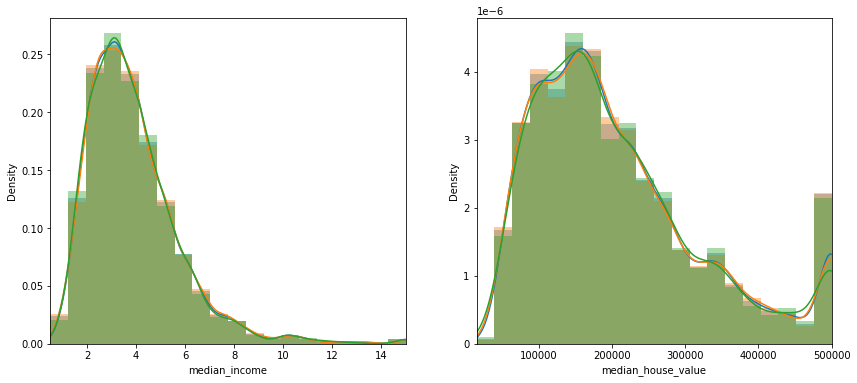

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(housing, test_size=0.33, random_state=6300)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for idx, col in enumerate(['median_income', 'median_house_value']):
    for df in [housing, train_data, test_data]:
        _ = sns.distplot(df[col], bins=20, ax=axes[idx])
    _ = axes[idx].set_xlim(housing[col].min(), housing[col].max())

Ideally, you may want each stratum of the median income has an adequate representation in the training and test datasets. The stratified sampling method serves this purpose. 

In scikit_learn, the __sklearn.model_selection.StratifiedShuffleSplit__ create stratified splits (see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html).

__Complete the following code to create a stratified split of training and testing data according to the median_income and compute the means and percents of each bin as shown in the above code.__

Hint: 
+ You can set n_splits=1 in the __StratifiedShuffleSplit__.
+ __StratifiedShuffleSplit.split(X, y)__ generate indices to split data into training and test set. The stratification is based on the __y__ label. For this question, what would you pass as the __y__ argument?

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

# Cut data by median_income
bins = [0., 1.5, 3.0, 4.5, 6.0, 8.0, 10.0, np.inf]
housing['income_level'] = pd.cut(housing['median_income'], bins, labels=[1, 2, 3, 4, 5, 6, 7])

splitter=StratifiedShuffleSplit(n_splits=1, test_size=0.33)

for train, test in splitter.split(housing, housing['income_level']):
    train_data['income_level'] = housing['income_level'].loc[train]
    test_data['income_level'] = housing['income_level'].loc[test]
    
# raise NotImplementedError()

<ipython-input-6-b8e1d46f77f9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['income_level'] = housing['income_level'].loc[train]
<ipython-input-6-b8e1d46f77f9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['income_level'] = housing['income_level'].loc[test]


In [7]:
df_income_levels = pd.DataFrame()
# Get median_income mean and count at each income level
for df in [housing, train_data, test_data]:
    df1 = df.groupby('income_level').agg({'median_income': ['mean', 'count']})
    df_income_levels = pd.concat([df_income_levels, df1], axis=1)

# Print median_income mean and percentage of samples at each income level
df_income_levels.columns = pd.MultiIndex.from_product([['all_data', "train_data", "test_data"], ["mean", "count"]])
income_level_counts = df_income_levels[('all_data', 'count')]
for dataset in ['all_data', 'train_data', 'test_data']:
    df_income_levels[(dataset, 'count')] = df_income_levels[(dataset, 'count')]/income_level_counts
df_income_levels.columns = pd.MultiIndex.from_product([['all_data', "train_data", "test_data"], ["mean", "percent"]])
df_income_levels

all_data         train_data            test_data          
                   mean percent       mean   percent       mean   percent
income_level                                                             
1              1.211262     1.0   1.192805  0.452555   1.251472  0.094891
2              2.325457     1.0   2.327976  0.448564   2.295558  0.109406
3              3.686134     1.0   3.685596  0.446379   3.660659  0.111249
4              5.132392     1.0   5.129012  0.456444   5.170308  0.116790
5              6.743286     1.0   6.742563  0.474282   6.713974  0.120215
6              8.679263     1.0   8.721366  0.468586   8.672615  0.102094
7             11.854762     1.0  11.739204  0.444805  11.623050  0.129870

# 3. Handle Missing Values

You may have noticed that the `total_bedrooms` contains some missing data. There are several options to handle attributes with missing values:

1. Remove the rows that contain missing features.
2. Remove the columns that contain missing features.
3. Replace the missing values with new values such as the mean, the median, etc.

The DataFrame methods `dropna()`, `drop()`, and `fillna()` can be used to handle missing data in a DataFrame.

Assume you choose the replacement option, you may consider a systematic solution that handle the following two scenarios:

+ Both the train data and test data need to handle the missing values.
+ When your system is going online, attributes that currently do not contain missing values may have missing values.

The `SimpleImputer` class in the scikit-leran library (https://scikit-learn.org/stable/modules/impute.html) can accomplish this goal. 

__Complete the following code to replace all missing values in each column with the means of that column in the train_data and save the cleaned data into a DataFrame named `df_num`.__

Hint: Because `SimpleImputer` is applicable to numerical attributes only, the DataFrame you will appply a `SimpleImputer` transform must not contain any non-numerical attribute. You can create a new DataFrame that contains all the numerical columns.

In [9]:
from sklearn.impute import SimpleImputer

# get all numeric columns
df_num = train_data[train_data.dtypes[train_data.dtypes == 'float64'].index]

imp=SimpleImputer(missing_values=np.NaN, strategy="mean")
df_num=pd.DataFrame(imp.fit_transform(df_num),columns = df_num.columns,index=df_num.index)
train_data.fillna(train_data.mean())
test_data.fillna(test_data.mean())


df_num
# raise NotImplementedError()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_level
19667,-120.82,37.50,21.0,2974.0,495.0,1313.0,461.0,4.4886,135400.0,INLAND,NaN
1356,-121.92,38.02,16.0,1840.0,355.0,1288.0,338.0,4.2067,125000.0,INLAND,3
549,-122.25,37.77,52.0,2156.0,458.0,872.0,445.0,3.2685,254200.0,NEAR BAY,3
11539,-118.00,33.75,26.0,1382.0,387.0,1977.0,368.0,2.7589,137500.0,<1H OCEAN,NaN
17865,-121.89,37.42,26.0,40.0,8.0,52.0,7.0,7.7197,225000.0,<1H OCEAN,5
...,...,...,...,...,...,...,...,...,...,...,...
15950,-122.44,37.72,49.0,1557.0,405.0,1173.0,385.0,3.4605,265000.0,NEAR BAY,3
11866,-121.08,40.19,11.0,919.0,199.0,69.0,43.0,1.6944,137500.0,INLAND,NaN
16231,-121.31,37.98,47.0,3386.0,663.0,1228.0,619.0,3.0625,141500.0,INLAND,3
16838,-122.48,37.57,34.0,4648.0,806.0,2282.0,814.0,4.5556,249000.0,NEAR OCEAN,NaN


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_level
17130,-122.15,37.47,38.0,1560.0,301.0,1331.0,316.0,3.0521,151500.0,NEAR BAY,3
9517,-123.20,39.15,27.0,990.0,238.0,592.0,225.0,2.0074,96200.0,<1H OCEAN,NaN
2644,-124.14,40.58,25.0,1899.0,357.0,891.0,355.0,2.6987,92500.0,<1H OCEAN,2
1882,-119.99,38.94,24.0,1216.0,289.0,421.0,185.0,3.1625,103600.0,INLAND,3
13278,-117.65,34.09,46.0,1214.0,281.0,701.0,294.0,2.7083,116300.0,INLAND,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11331,-117.94,33.75,30.0,5268.0,1093.0,4480.0,1050.0,4.0150,186700.0,<1H OCEAN,NaN
1777,-122.35,37.94,45.0,2112.0,493.0,1406.0,452.0,2.3456,105200.0,NEAR BAY,2
6748,-118.07,34.11,47.0,832.0,194.0,419.0,156.0,3.1576,225000.0,<1H OCEAN,NaN
10603,-117.81,33.67,9.0,1567.0,299.0,675.0,294.0,5.2124,199600.0,<1H OCEAN,4


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19667,-120.82,37.50,21.0,2974.0,495.0,1313.0,461.0,4.4886,135400.0
1356,-121.92,38.02,16.0,1840.0,355.0,1288.0,338.0,4.2067,125000.0
549,-122.25,37.77,52.0,2156.0,458.0,872.0,445.0,3.2685,254200.0
11539,-118.00,33.75,26.0,1382.0,387.0,1977.0,368.0,2.7589,137500.0
17865,-121.89,37.42,26.0,40.0,8.0,52.0,7.0,7.7197,225000.0
...,...,...,...,...,...,...,...,...,...
15950,-122.44,37.72,49.0,1557.0,405.0,1173.0,385.0,3.4605,265000.0
11866,-121.08,40.19,11.0,919.0,199.0,69.0,43.0,1.6944,137500.0
16231,-121.31,37.98,47.0,3386.0,663.0,1228.0,619.0,3.0625,141500.0
16838,-122.48,37.57,34.0,4648.0,806.0,2282.0,814.0,4.5556,249000.0


In [10]:
# Test if there are still missing values
all(df_num.isna().sum() == 0)

True

In [11]:
# Test if the number of samples has been changed
train_data.shape[0] == df_num.shape[0]

True

In [12]:
# Test if the means of the train_data and df_num are same
assert np.abs(train_data['total_bedrooms'].mean() - df_num['total_bedrooms'].mean()) <= 1e-4

## 4. Add Combined Attributes

When you build a machine learning model, you may often find that a derived attribute from combing two raw attributes can have a stronger relationship with the target variable. 

In the housing data, there are four aggregated counts attributes: `total_rooms`, `total_bedrooms`, `population`, and `household`. Intuitively, `median_house_value` will have a stronger relation with  a ratio like `rooms_per_household` than with an aggregation like `total_room`. 

You can write a program  to test which combination may have a strong correlation as follows.

In [13]:
attrs = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value']
df_test = df_num[attrs].copy()
derived_attrs = []
for attr1 in attrs[:-1]:
    for attr2 in attrs[:-1]:
        if attr2 == attr1:
            continue
        derived_attr = attr1+'_'+attr2
        derived_attrs.append(derived_attr)
        df_test[derived_attr] = df_test[attr1]/df_test[attr2]

In [14]:
candidate_attrs = attrs + derived_attrs
corrs = df_test.corr()['median_house_value'].drop(index='median_house_value').sort_values(ascending=False)
print(corrs)

total_rooms_total_bedrooms    0.374073
households_population         0.272061
total_rooms_population        0.212530
total_rooms_households        0.152462
total_rooms                   0.134254
households_total_bedrooms     0.079665
total_bedrooms_population     0.065858
households                    0.064770
total_bedrooms                0.047988
population_total_bedrooms    -0.021007
population_households        -0.026617
population                   -0.027891
population_total_rooms       -0.031736
total_bedrooms_households    -0.033894
total_bedrooms_total_rooms   -0.214062
households_total_rooms       -0.220833
Name: median_house_value, dtype: float64


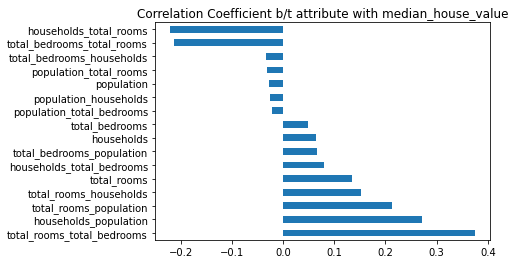

In [15]:
_ = corrs.plot.barh(title='Correlation Coefficient b/t attribute with median_house_value')

Answer the following questions based on the above results.

__Question 4(a)__. Among `households`, `population`, `household_size`, and `household_population_ratio`, which one has the strongest relation with `'median_house_value`? (Note: `household_size = population/households`) Assign your answer to a string variable `answer`.

In [16]:
answer = "household_population_ratio"
# raise NotImplementedError()
answer 

'household_population_ratio'

__Question 4(b)__. Does a higher `room_bedroom_ratio` increase the `median_house_value` or decrease the `median_house_value`? Assign your answer (either `increase` or `descrease`) to a string variable `answer`.

In [17]:
answer = "increase"
# raise NotImplementedError()
answer 

'increase'

__Question 4(c)__. Assume you decide to add the three derive attributes, `rooms_per_bedroom`,  `household_per_population`, and `rooms_per_household` to `df_num`, write some code to achieve that goal.

In [18]:
df_num['rooms_per_bedroom'] = pd.Series(np.random.randn(len(df_num)), index=df_num.index)
df_num['household_per_population'] = pd.Series((df_num['households']/df_num['population']), index=df_num.index)
df_num['rooms_per_household'] = pd.Series(np.random.randn(len(df_num)), index=df_num.index)
# raise NotImplementedError()
df_num.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_bedroom,household_per_population,rooms_per_household
19667,-120.82,37.50,21.0,2974.0,495.0,1313.0,461.0,4.4886,135400.0,2.006780,0.351104,-0.066621
1356,-121.92,38.02,16.0,1840.0,355.0,1288.0,338.0,4.2067,125000.0,0.833434,0.262422,-0.814078


In [19]:
assert all([col in df_num for col in ['rooms_per_bedroom', 'household_per_population', 'rooms_per_household']])

In [20]:
assert np.abs(df_num['household_per_population'].mean() - (df_num['households']/df_num['population']).mean()) < 1.0e-6

## 5. Handling Text and Categorical Attributes

Categorical data is one type of structured data we frequently see in data science. For example, the position of a football player, the weather of a day, the size of a shirt, the genres of music and country name are all categorical data.

In categorical data, the values of a data attribute are discrete and belong to a finite set of groups, which are often known as classes or labels. The values of a categorical data can be numeric or textual.

There are two major classes of categorical data: nominal and ordinal. 

+ For nominal categorical attribute, there is no concept of ordering among the values of the attribute. For example, The types of weathers are nominal data.

+ For ordinal categorical attribute, you can place the attributes into some kind of order or scale. For example, you can rate the happiness on a scale of 1-10. Similarly, shoe sizes, education level, income levels, and hurricane categories are examples of ordinal data.

__Question 5(a)__. Is __ocean_proximity__ `nominal categorical data` or `ordinal categorical data`? Assign your answer to a string variable `answer`.

In [21]:
answer = "nominal categorial data"
# raise NotImplementedError()
answer

'nominal categorial data'

In [22]:
assert any(['ordinal' in answer.lower(), 'nominal' in answer.lower()])
# There is a hidden test here
assert any(['nominal' in answer.lower()])

__Question 5(b)__. There are multiple ways to encode categorical data such as using `pandas.get_dummies()` method or `sklearn.preprocessing.OneHotEncoder` (see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

__Complete the code that convert the __ocean_proximity__ categorical data into one-hot vectors using `sklearn.preprocessing.OneHotEncoder`. Save the encoded results to a variable named __housing_cat_1hot__.

In [23]:
from sklearn.preprocessing import OneHotEncoder
from scipy import sparse

housing_cat = train_data[["ocean_proximity"]]
enc = OneHotEncoder()
enc.fit(housing_cat)
housing_cat_1hot = enc.transform(housing_cat).toarray()
housing_cat_1hot = sparse.csr_matrix(housing_cat_1hot)
print(type(housing_cat_1hot))
print(housing_cat_1hot[:4])

OneHotEncoder()

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 3)	1.0
  (3, 0)	1.0


In [24]:
import scipy
assert isinstance(housing_cat_1hot, scipy.sparse.csr.csr_matrix)

In [25]:
assert housing_cat_1hot.shape[1] == len(train_data["ocean_proximity"].value_counts())

## 6. Remove Capped Data

During exploratory data analysis, we have found that the maximum values of several attributes are capped. It might be a good idea to drop those samples.

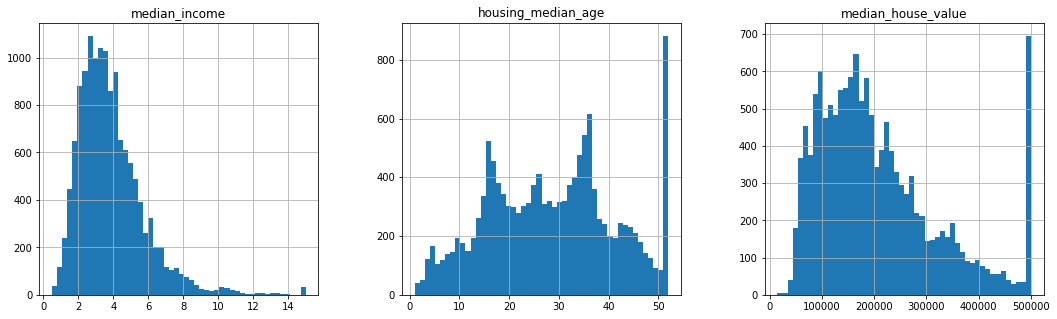

In [26]:
_ = train_data[['median_income', 'housing_median_age', 'median_house_value']].hist(bins=50, layout=(1, 3), figsize=(18, 5))

__Question 6(a)__. __Write some code to drop the samples whose attribute values are capped.__

Hint: You can use the `DataFrame['attr'].max()` method to find the upper cap of the attribute 'attr'.

In [27]:
for col in ['median_house_value', 'housing_median_age', 'median_income']:
    train_data.drop(train_data[train_data[col] >= train_data[col].max()].index, inplace = True) 

train_data.max()
# raise NotImplementedError()

/home/dacena/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/dacena/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/dacena/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


longitude                -114.31
latitude                   41.88
housing_median_age            51
total_rooms                37937
total_bedrooms              6445
population                 35682
households                  6082
median_income            13.1477
median_house_value        500000
ocean_proximity       NEAR OCEAN
income_level                   7
dtype: object

In [28]:
# assert all([not any(train_data[col] >= attribute_caps[col])
for col in ['median_house_value', 'housing_median_age', 'median_income']:
    train_data[col].max()

500000.0

51.0

13.1477

In [29]:
assert all([not any(train_data[col] >= attribute_caps[col])
            for col in ['median_house_value', 'housing_median_age', 'median_income']])

Now replot the histogram to validate that those samples are removed.

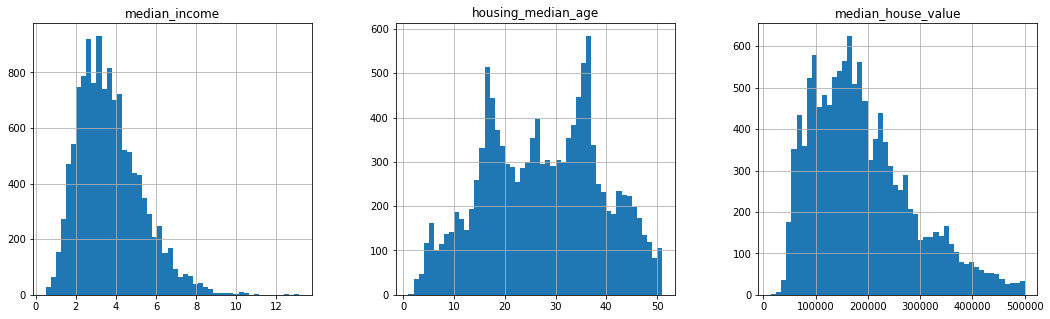

In [30]:
_ = train_data[['median_income', 'housing_median_age', 'median_house_value']].hist(bins=50, layout=(1, 3), figsize=(18, 5))

## 7. Feature Scaling

With few exceptions, machine learning algorithms don’t perform well when the input numerical attributes have different scales. For the housing data, the total number of rooms ranges from 6 to 39,320, while the median income ranges from 0 to 15.

There are two common approaches to scale the attributes: min-max scaling and standardization.

Min-max scaling is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1.

Standardization is different: first, it subtracts the mean value (so standardized values always have a zero mean); then it divides the difference by the standard deviation so that the resulting distribution has unit variance.

__Question 7(a)__. __Write some code to standardize the housing train data using `sklearn.preprocessing.StandardScaler`__. Save the transformed data into a variable `num_tr`__.

In [31]:
from sklearn.preprocessing import StandardScaler
df_num = train_data.drop("ocean_proximity", axis=1)

scaler = StandardScaler()
scaler.fit(df_num)
    
num_tr = scaler.transform(df_num)
# raise NotImplementedError()

StandardScaler()

In [32]:
df = pd.DataFrame(num_tr)
df.columns = df_num.columns
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_level
0,-0.684068,0.902711,-0.526074,0.137443,-0.125117,-0.13817,-0.125514,0.499683,-0.566912,NaN
1,-1.240055,1.145917,-0.961810,-0.378124,-0.455484,-0.15947,-0.446077,0.320774,-0.675395,0.025195


In [33]:
assert isinstance(num_tr, np.ndarray)

In [34]:
# test mean is 0
assert all(np.abs(df.mean()) < 1e-6)

In [35]:
# test stand deviation is 1
assert all(df.std() - 1 < 1e-3)

## 8. Put things together

Preparing a dataset for machine learning is a tedious process, which involves multiple steps in a specific order. Creating a pipeline or write a data clean module is one way to automate this process.

Initially, I planned to ask you to implement a full pipeline using the Pipeline class in the `scikit-learn` library but found a few issues in the implementation. Therefore, I provide a reference solution to implement a basic data cleaning task and then invoke them in a sequence. Although you are not required to write the code in this assignment, you may still go through the code so that you know how to start when you implement a data cleaning process in your own project. 

In [36]:
# 0. import required modules
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedShuffleSplit

# 1. Get the data
housing = pd.read_csv("input/housing.csv")
assert isinstance(housing, pd.DataFrame)

In [37]:
# 2. Separate numeric and categorical features
num_attribs = [col for col in housing.columns if col not in ["median_house_value", "ocean_proximity"]]
cat_attribs = ["ocean_proximity"]
ocean_proximity_categories =  list(housing["ocean_proximity"].value_counts().index)
attribute_caps = housing[['median_income', 'housing_median_age', 'median_house_value']].max()

In [38]:
# 3. Remove capped values
def remove_capped_samples(df):
    # Record attribute cap
    indices = np.logical_and((df['median_house_value'] < attribute_caps['median_house_value']).values,
                             (df['housing_median_age'] < attribute_caps['housing_median_age']).values,
                             (df['median_income'] < attribute_caps['median_income']).values)
    df = df[indices]
    return df.reset_index(drop=True)

In [39]:
housing = remove_capped_samples(housing)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY


In [40]:
# 4. Impute missing values
def impute_missing_values(df, numeric_attribs):
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
    _ = imputer.fit(df[numeric_attribs])
    df_num = pd.DataFrame(imputer.transform(df[numeric_attribs]), columns=numeric_attribs)
    return df_num

In [41]:
df_num = impute_missing_values(housing, num_attribs)
df_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911
...,...,...,...,...,...,...,...,...
18567,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
18568,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
18569,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
18570,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [42]:
# 5. Adds combined attributes
def add_combined_attributes(df):
    df['rooms_per_household'] = df['total_rooms'] / df['households']
    df['population_per_household'] = df['population'] / df['households']
    df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
    return df

In [43]:
df_num = add_combined_attributes(df_num)
df_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842,0.155797
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,4.294118,2.026891,0.260274
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,4.242424,2.640152,0.252679
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,5.343675,2.362768,0.203216


In [44]:
# 6. Encode categorical data
def encode_categorical_data(df, cat_attribs):
    df_cat = None
    for attr in cat_attribs:
        if not df_cat:
            df_cat = pd.get_dummies(df[attr], prefix=attr)
        else:
            df_cat = pd.concat(df_cat, pd.get_dummies(df[attr], prefix=attr))
    return df_cat

In [45]:
df_cat = encode_categorical_data(housing, cat_attribs)
df_cat.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [46]:
# 7. Combine column transfermations
def transform_columns(df):
    target = df['median_house_value']
    
    df_num = impute_missing_values(df, num_attribs)
    add_combined_attributes(df_num)
    
    df_cat = encode_categorical_data(df, cat_attribs)
      
    df = pd.concat([df_num, df_cat, target], axis=1)
    
    return df

housing = transform_columns(housing)
housing.head()
    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556,0.146591,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842,0.155797,0,0,0,1,0,358500.0
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,4.294118,2.026891,0.260274,0,0,0,1,0,226700.0
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,4.242424,2.640152,0.252679,0,0,0,1,0,140000.0
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,5.343675,2.362768,0.203216,0,0,0,1,0,158700.0


In [47]:
# 8. Split data into training data and testing data
def stratified_split(df, test_size=0.25, random_state=0):
    # Cut data by median_income
    bins = [0., 1.5, 3.0, 4.5, 6.0, 8.0, 10.0, np.inf]
    df['income_level'] = pd.cut(df['median_income'], bins, labels=range(1, len(bins)))

    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    for train_index, test_index in split.split(df, df["income_level"]):
        train_data_ = df.iloc[train_index].copy()
        test_data_ = df.iloc[test_index].copy()
        break
    for dataset_ in (train_data_, test_data_):
        dataset_.drop("income_level", axis=1, inplace=True)

    # Reset the index to simplify later columns joins
    train_data_ = train_data_.reset_index(drop=True)
    test_data_ = test_data_.reset_index(drop=True)
    return train_data_, test_data_

In [48]:
housing_train, housing_test = stratified_split(housing, 0.25, 6300)
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-117.25,33.05,16.0,2794.0,476.0,1387.0,442.0,4.3286,6.321267,3.138009,0.170365,0,0,0,0,1,213400.0
1,-118.14,33.76,44.0,1633.0,536.0,741.0,513.0,3.3850,3.183236,1.444444,0.328230,0,0,0,0,1,408300.0
2,-121.89,37.27,28.0,1481.0,256.0,688.0,221.0,5.2088,6.701357,3.113122,0.172856,1,0,0,0,0,240900.0
3,-122.07,37.93,45.0,1544.0,244.0,614.0,238.0,5.0255,6.487395,2.579832,0.158031,0,0,0,1,0,226000.0
4,-118.10,33.84,35.0,1790.0,269.0,924.0,263.0,5.2960,6.806084,3.513308,0.150279,1,0,0,0,0,226200.0


In [49]:
housing_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-118.00,33.82,21.0,2253.0,580.0,1536.0,500.0,3.2326,4.506000,3.072000,0.257435,1,0,0,0,0,204700.0
1,-121.99,37.30,28.0,4863.0,901.0,2110.0,868.0,5.1483,5.602535,2.430876,0.185277,1,0,0,0,0,342000.0
2,-118.41,34.00,37.0,1426.0,259.0,689.0,261.0,5.5284,5.463602,2.639847,0.181627,1,0,0,0,0,331000.0
3,-122.17,37.43,24.0,3924.0,1142.0,7174.0,950.0,4.0972,4.130526,7.551579,0.291030,0,0,0,0,1,387500.0
4,-117.41,34.11,29.0,3999.0,772.0,2602.0,760.0,3.5481,5.261842,3.423684,0.193048,0,1,0,0,0,105500.0


In [50]:
# 9. Save the cleaned data
housing_train.to_csv("input/housing_train_cleaned.csv", index=False)
housing_test.to_csv("input/housing_test_cleaned.csv", index=False)

In [51]:
# 10. Create scaled data
def scale_cleaned_data():
    df_train = pd.read_csv("input/housing_train_cleaned.csv")  

    columns_to_scale = df_train.columns[0:11]
    columns_no_sacle = df_train.columns[11:]
    
    scaler = StandardScaler()
    scaler.fit(df_train[columns_to_scale])
    
    num_tr = scaler.transform(df_train[columns_to_scale])
    df_num_tr = pd.DataFrame(num_tr, columns=columns_to_scale)
    df_train = pd.concat([df_num_tr, df_train[columns_no_sacle]], axis=1)
    df_train.to_csv("input/housing_train_scaled.csv", index=False)
    
    df_test = pd.read_csv("input/housing_test_cleaned.csv")
    num_tr = scaler.transform(df_test[columns_to_scale])
    df_num_tr = pd.DataFrame(num_tr, columns=columns_to_scale)
    df_test = pd.concat([df_num_tr, df_test[columns_no_sacle]], axis=1)
    df_test.to_csv("input/housing_test_scaled.csv", index=False)
    

scale_cleaned_data()

In [52]:
import os
assert all([os.path.exists("input/housing_{}_cleaned.csv".format(fn)) for fn in ['train', 'test']])
assert all([os.path.exists("input/housing_{}_scaled.csv".format(fn)) for fn in ['train', 'test']])

In [53]:
df_train_1 = pd.read_csv('input/housing_train_cleaned.csv')
df_test_1 = pd.read_csv('input/housing_test_cleaned.csv')
assert df_test_1.shape[1] == df_train_1.shape[1]

In [54]:
# Test if there are missing data
assert all(df_test_1.isna())

In [55]:
# Test if a combined attributes exists
assert 'rooms_per_household' in df_test_1.columns

In [56]:
# Test if categorical features are transformed correctly
assert all([sorted(list(df_test_1.iloc[::, pos].unique())) == list([0, 1]) for pos in range(11,16)])

### Short Questions

__Question 8(a)__. In the features scaling step, we didn't scale the traget variable. __Could you explain why?__ (3 points)

In [ ]:
Because it is unnecessary to scale the target variable. 

# Type your answer here

__Question 8(b)__. In the above example, we use the feature means to replace the missing values in the data. This works for the numeric features. For categorical features, what would you do for the missing data? (3 points)

We can encode the categorical values into numeric value using LabelEncoder class then a nominal feature encoding.

# Type your answer here

__Question 8(c)__. In the feature scaling step, I use the cleaned train data to fit a standard scaler and then apply the scaler to scale both train data and test data. Could you explain why I should not fit a new standard scaler from the test data and use such scaler to scale the test data? 

# Type your answer here

__Question 8(d)__. Another subtle issue occurs when applying the OneHotEncode() to train data and test data separately but not all the categorical levels are included in both data sets. Can you explain why this is a problem?

# Type your answer here

__End of Part C__